In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pandas

In [3]:
from scipy.signal import convolve2d

In [7]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (_, _) = cifar10.load_data()
image = X_train[0]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
image_gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])  # convert to grayscale

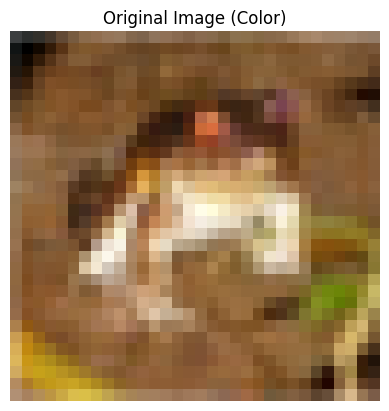

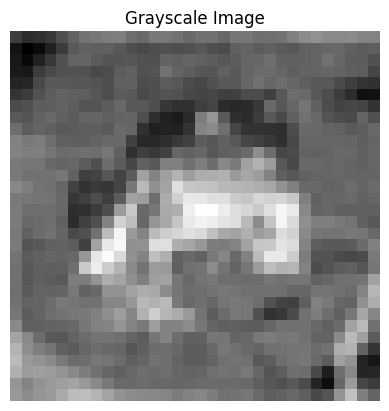

In [9]:
plt.imshow(image)
plt.title("Original Image (Color)")
plt.axis("off")
plt.show()

plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [10]:
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

In [11]:
edge_kernel = np.array([[-1,-1,-1],
                        [-1, 8,-1],
                        [-1,-1,-1]])

In [12]:
blur_kernel = np.ones((3,3)) / 9.0

In [13]:
kernels = {
    "Sharpen": sharpen_kernel,
    "Edge Detection": edge_kernel,
    "Blur": blur_kernel
}

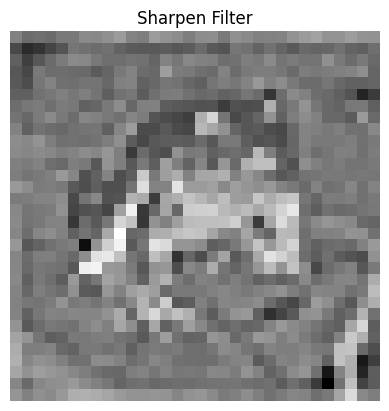

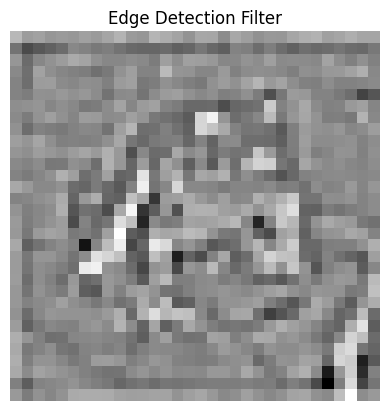

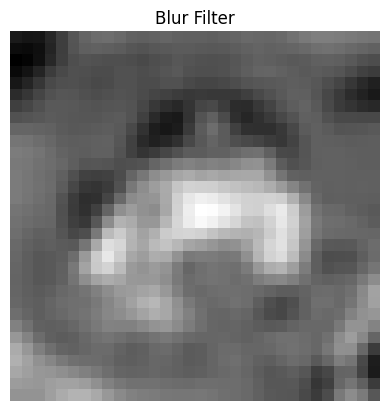

In [14]:
for name, kernel in kernels.items():
    filtered = convolve2d(image_gray, kernel, mode="same", boundary="symm")
    plt.imshow(filtered, cmap="gray")
    plt.title(f"{name} Filter")
    plt.axis("off")
    plt.show()

In [15]:
image = np.array([
    [10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10]
])

In [16]:
output = np.zeros((image.shape[0]-2, image.shape[1]-2))

print("Kernel:\n", kernel)

Kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


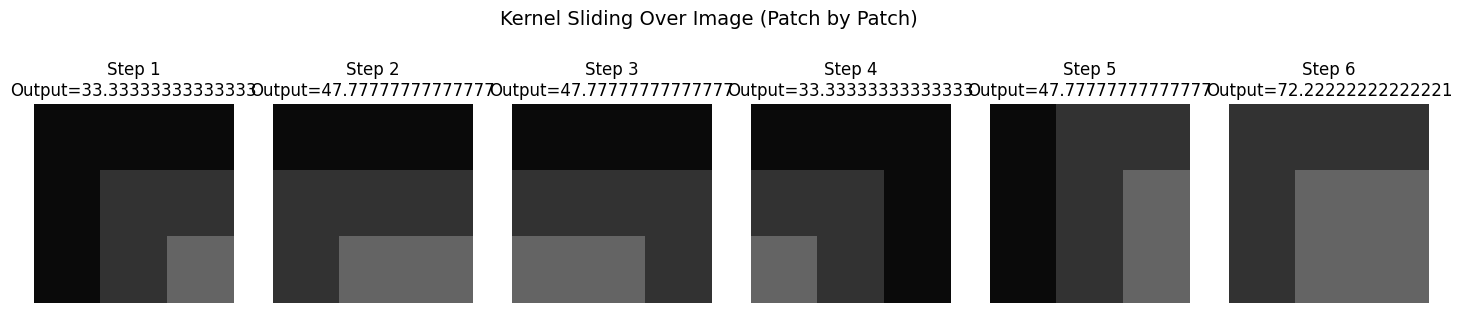

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(18, 4))

step = 0
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        # Extract 3x3 patch
        patch = image[i:i+3, j:j+3]
        # Convolution: elementwise multiply + sum
        value = np.sum(patch * kernel)
        output[i,j] = value

        if step < 6:  # show first 6 steps only
            axes[step].imshow(patch, cmap="gray", vmin=0, vmax=255)
            axes[step].set_title(f"Step {step+1}\nOutput={value}")
            axes[step].axis("off")
            step += 1

plt.suptitle("Kernel Sliding Over Image (Patch by Patch)", fontsize=14)
plt.show()

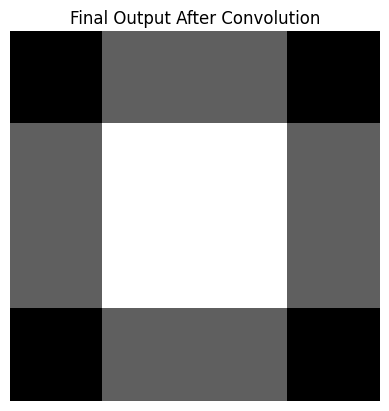

In [18]:
plt.imshow(output, cmap="gray")
plt.title("Final Output After Convolution")
plt.axis("off")
plt.show()

In [30]:
output_valid = convolve2d(image, kernel, mode="valid")

In [31]:
output_same = convolve2d(image, kernel, mode="same")

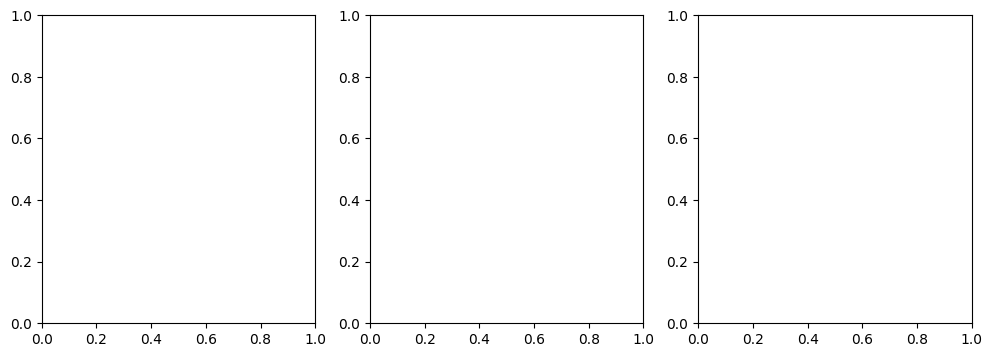

In [32]:
fig,axes = plt.subplots(1,3,figsize=(12,4))

In [28]:
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(output_valid, cmap="gray")
axes[1].set_title(f"VALID Padding\nOutput size: {output_valid.shape}")
axes[1].axis("off")

axes[2].imshow(output_same, cmap="gray")
axes[2].set_title(f"SAME Padding\nOutput size: {output_same.shape}")
axes[2].axis("off")

plt.suptitle("VALID vs SAME Padding in Convolution", fontsize=14)
plt.show()

<Figure size 640x480 with 0 Axes>

In [29]:
image = np.array([
    [10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10]
])

# 2. Define an edge detection kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

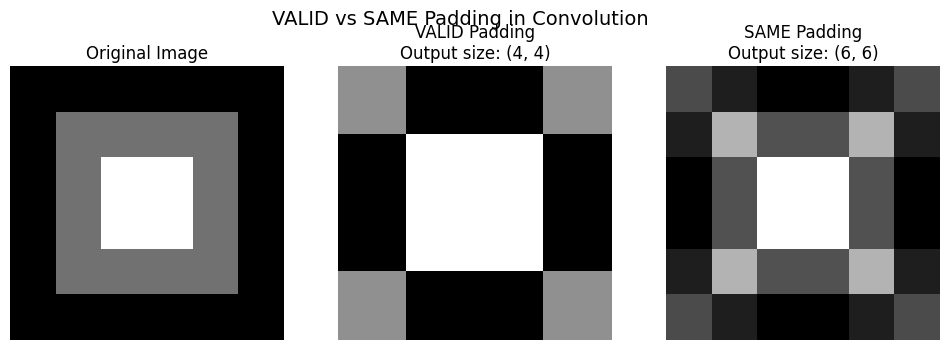

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 1. Small toy grayscale image (6x6)
image = np.array([
    [10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10]
])

# 2. Define an edge detection kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# 3. Convolution with VALID padding (no padding, output smaller)
output_valid = convolve2d(image, kernel, mode="valid")

# 4. Convolution with SAME padding (zero padding, output same size as input)
output_same = convolve2d(image, kernel, mode="same")

# 5. Visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(output_valid, cmap="gray")
axes[1].set_title(f"VALID Padding\nOutput size: {output_valid.shape}")
axes[1].axis("off")

axes[2].imshow(output_same, cmap="gray")
axes[2].set_title(f"SAME Padding\nOutput size: {output_same.shape}")
axes[2].axis("off")

plt.suptitle("VALID vs SAME Padding in Convolution", fontsize=14)
plt.show()

Part 1: Manual Kernel Filters


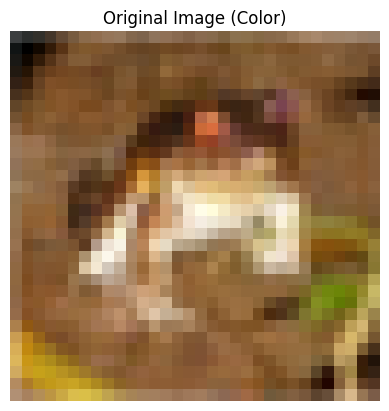

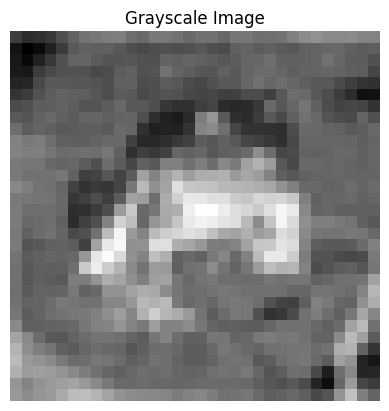

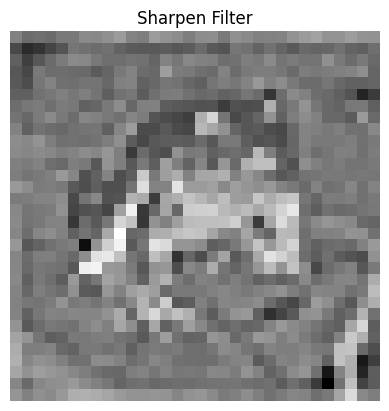

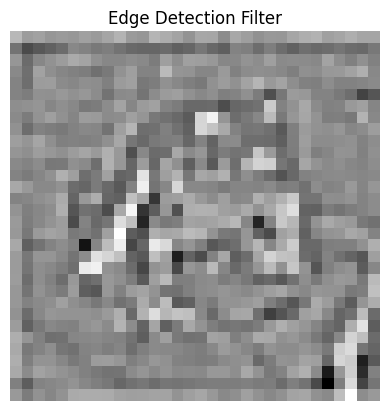

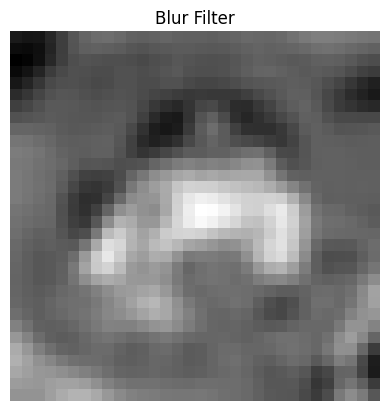

Part 2: Kernel Sliding Visualization


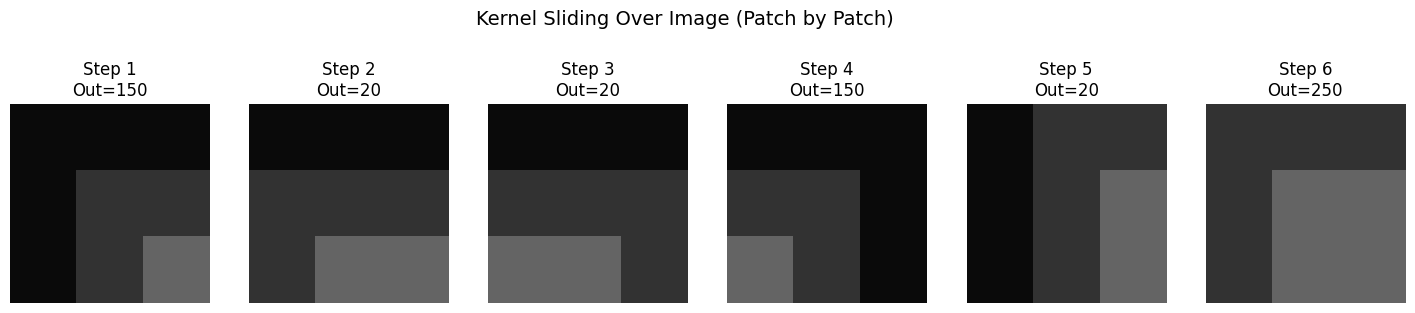

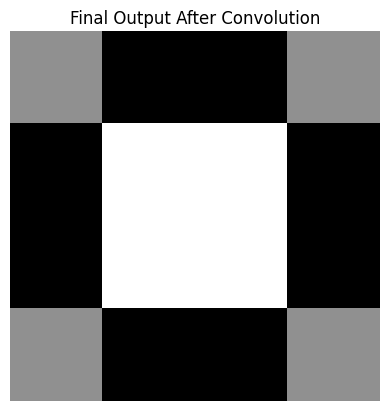

Part 3: VALID vs SAME Padding


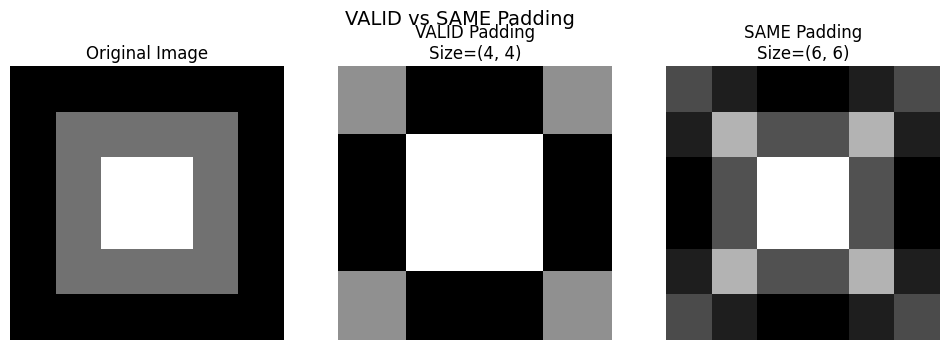

Part 4: Interactive Gradio App
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d881aef7836d4b01c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tensorflow.keras.datasets import cifar10
import gradio as gr
from PIL import Image

# -------------------------------
# Part 1: Manual Kernel Filters
# -------------------------------
print("Part 1: Manual Kernel Filters")

# Load one CIFAR-10 image
(X_train, y_train), (_, _) = cifar10.load_data()
image = X_train[0]   # first image
image_gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])  # convert to grayscale

plt.imshow(image)
plt.title("Original Image (Color)")
plt.axis("off")
plt.show()

plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Define kernels
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

edge_kernel = np.array([[-1,-1,-1],
                        [-1, 8,-1],
                        [-1,-1,-1]])

blur_kernel = np.ones((3,3)) / 9.0

kernels = {"Sharpen": sharpen_kernel, "Edge Detection": edge_kernel, "Blur": blur_kernel}

# Apply kernels
for name, kernel in kernels.items():
    filtered = convolve2d(image_gray, kernel, mode="same", boundary="symm")
    plt.imshow(filtered, cmap="gray")
    plt.title(f"{name} Filter")
    plt.axis("off")
    plt.show()

# -------------------------------
# Part 2: Step-by-Step Kernel Sliding
# -------------------------------
print("Part 2: Kernel Sliding Visualization")

# Toy 6x6 image
toy_image = np.array([
    [10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50,100,100, 50, 10],
    [10, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10]
])

# Simple edge kernel
edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

output = np.zeros((toy_image.shape[0]-2, toy_image.shape[1]-2))

fig, axes = plt.subplots(1, 6, figsize=(18, 4))
step = 0
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        patch = toy_image[i:i+3, j:j+3]
        value = np.sum(patch * edge_kernel)
        output[i,j] = value

        if step < 6:  # Show first 6 steps only
            axes[step].imshow(patch, cmap="gray", vmin=0, vmax=255)
            axes[step].set_title(f"Step {step+1}\nOut={value}")
            axes[step].axis("off")
            step += 1

plt.suptitle("Kernel Sliding Over Image (Patch by Patch)", fontsize=14)
plt.show()

plt.imshow(output, cmap="gray")
plt.title("Final Output After Convolution")
plt.axis("off")
plt.show()

# -------------------------------
# Part 3: VALID vs SAME Padding
# -------------------------------
print("Part 3: VALID vs SAME Padding")

# Convolution with VALID padding
output_valid = convolve2d(toy_image, edge_kernel, mode="valid")

# Convolution with SAME padding
output_same = convolve2d(toy_image, edge_kernel, mode="same")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(toy_image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(output_valid, cmap="gray")
axes[1].set_title(f"VALID Padding\nSize={output_valid.shape}")
axes[1].axis("off")

axes[2].imshow(output_same, cmap="gray")
axes[2].set_title(f"SAME Padding\nSize={output_same.shape}")
axes[2].axis("off")

plt.suptitle("VALID vs SAME Padding", fontsize=14)
plt.show()

# -------------------------------
# Part 4: Gradio Interactive Demo
# -------------------------------
print("Part 4: Interactive Gradio App")

def apply_filter(img, filter_type):
    # Convert image to grayscale
    img = img.convert("L")
    img = np.array(img)

    # Select kernel
    if filter_type == "Sharpen":
        kernel = sharpen_kernel
    elif filter_type == "Edge Detection":
        kernel = edge_kernel
    else:
        kernel = blur_kernel

    # Apply convolution
    filtered = convolve2d(img, kernel, mode="same", boundary="symm")
    filtered = np.clip(filtered, 0, 255).astype(np.uint8)

    return Image.fromarray(filtered)

demo = gr.Interface(
    fn=apply_filter,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Radio(["Sharpen", "Edge Detection", "Blur"], label="Choose Filter")
    ],
    outputs=gr.Image(type="pil", label="Filtered Image"),
    title="Kernel Filter Demo",
    description="Upload an image and apply Sharpen, Edge Detection, or Blur filter."
)

demo.launch()